<a href="https://colab.research.google.com/github/mahesh-ml/MLBasics/blob/main/Hclustre-Normalized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     |████████████████████████████████| 81kB 5.4MB/s 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


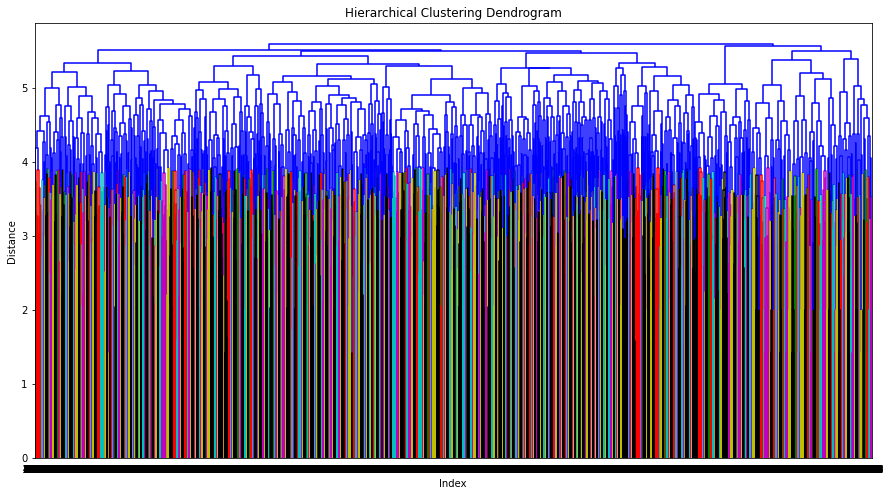

,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,clust
0,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,1
1,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,1
3,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,No,Basic,Bachelor,10/2/2011,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,1
9130,3096.511217,Yes,Extended,College,12/2/2011,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,0
9131,8163.890428,No,Extended,Bachelor,6/2/2011,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,0
9132,7524.442436,No,Extended,College,3/2/2011,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,1


In [7]:
import pandas as pd
import matplotlib.pylab as plt
from google.colab import drive
drive.mount('/content/drive')
import os 
folder = os.path.join('/content/drive/My Drive/hclust')

data1 = pd.read_csv("/content/drive/My Drive/hclust/AutoInsurance.csv")


data1.describe()
data1.head()

data1

data2 = data1.iloc[:,2:25]

data2
#drop na and imopute mean for missing values
data2.dropna()
from sklearn.impute import SimpleImputer
import numpy as np

imp = SimpleImputer(strategy="most_frequent")
imp.fit_transform(data2)
data2
data2.dtypes


#one hot encoding for categorical
!pip install category_encoders 
import category_encoders as ce
obj_df = data2.select_dtypes(include=['object'])
categorical_columns = obj_df.columns
encoder = ce.OneHotEncoder(cols=categorical_columns, use_cat_names=True)
df_train_encoded = encoder.fit_transform(data2)
df_train_encoded
# Normalization function 
def norm_func(i):
    x = (i-i.min())	/ (i.max()-i.min())
    return (x)



# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(df_train_encoded)
df_norm.describe()

# for creating dendrogram 
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch 

z = linkage(df_norm, method = "complete", metric = "euclidean")

# Dendrogram
plt.figure(figsize=(15, 8));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(z, 
    leaf_rotation = 0,  # rotates the x axis labels
    leaf_font_size = 10 # font size for the x axis labels
)
plt.show()


# Now applying AgglomerativeClustering choosing 5 as clusters from the above dendrogram
from sklearn.cluster import AgglomerativeClustering

h_complete = AgglomerativeClustering(n_clusters = 2, linkage = 'complete', affinity = "euclidean").fit(df_norm) 
h_complete.labels_

cluster_labels = pd.Series(h_complete.labels_)

data2['clust'] = cluster_labels # creating a new column and assigning it to new column 

data2

In [10]:
data3 = data2.iloc[:, [22,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]]
data3.head()

# Aggregate mean of each cluster
data3.iloc[:, 1:].groupby(data2.clust).mean()

# creating a csv file 
data3.to_csv("/content/drive/My Drive/hclust/clusturing41_python.csv", encoding = "utf-8")

import os
os.getcwd()

'/content'